In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

# 1. Read the dataset to python environment

In [2]:
df=pd.read_excel('/Users/nidhi.anil/Downloads/Iri_s.xls')

In [3]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. Do the necessary pre-processing steps

In [5]:
# Finding missing values 

df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
df['SL'] = df['SL'].fillna(df['SL'].median())
df['SW'] = df['SW'].fillna(df['SL'].median())
df['PL'] = df['PL'].fillna(df['PL'].median())


In [11]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

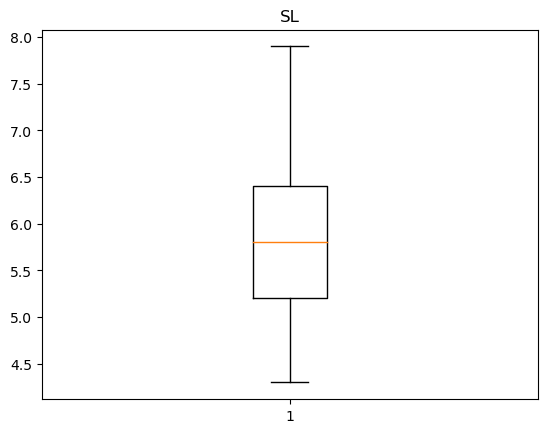

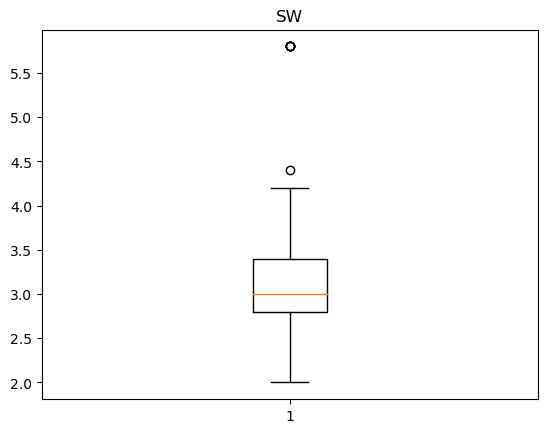

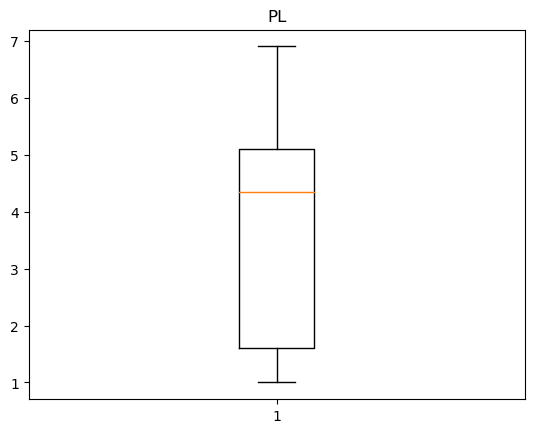

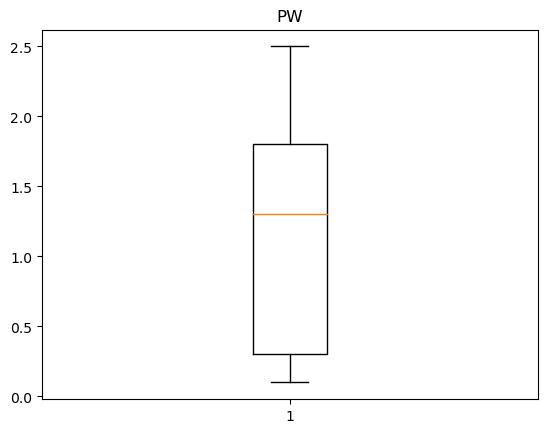

In [14]:
# Finding outliers

col = ['SL','SW','PL','PW']
for i in col:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()
    

In [16]:
# Handling outliers of 'SW' column

Q1 = df['SW'].quantile(0.25)
Q2 = df['SW'].quantile(0.50)
Q3 = df['SW'].quantile(0.75)

print('Q1= ',Q1)
print('Q2= ',Q2)
print('Q3= ',Q3)



Q1=  2.8
Q2=  3.0
Q3=  3.4


In [17]:
IQR = Q3-Q1
print('IQR= ',IQR)


IQR=  0.6000000000000001


In [19]:
u_lim = Q3+1.5*IQR
l_lim = Q1-1.5*IQR

outlier = []
for i in df['SW']:
    if (i<l_lim) or (i>u_lim):
        outlier.append(i)
print('Outliers= ',outlier)

Outliers=  [5.8, 4.4, 5.8, 5.8, 5.8, 5.8, 5.8]


In [21]:
ind=df['SW']>u_lim
df.loc[ind].index

Int64Index([10, 15, 27, 43, 72, 98, 124], dtype='int64')

In [22]:
df.drop(df.loc[ind].index,inplace=True)

In [23]:
df.shape

(143, 5)

In [57]:
df['SW'] = np.where(df['SW'] > u_lim, u_lim, np.where(df['SW'] < l_lim, l_lim, df['SW']))


# Encoding

In [28]:
le = LabelEncoder()
df['Classification'] = le.fit_transform(df['Classification'])

In [30]:
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [31]:
df['Classification'].unique()

array([0, 1, 2])

# Classification Models

In [33]:
# Splitting data to feature and target

x = df.drop(['Classification'],axis=1)    # Features
y = df['Classification']                  # Target

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


# 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred_lr = logit_model.predict(x_test)
y_pred_lr

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1])

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


print('Accuracy = ',accuracy_score(y_test,y_pred_lr))
print('Precision = ',precision_score(y_test,y_pred_lr,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_lr,average='macro'))
print('Confusion matrix = \n',confusion_matrix(y_test,y_pred_lr))

Accuracy =  0.8888888888888888
Precision =  0.883838383838384
Recall =  0.883838383838384
f1 score =  0.883838383838384
Confusion matrix = 
 [[13  0  0]
 [ 0  9  2]
 [ 0  2 10]]


# 2. KNN

In [40]:
# Choosing k value

from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    Classifier.fit(x_train,y_train)
    y_pred_knn = Classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

In [41]:
# Model creation 

Classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski',p=2)
Classifier.fit(x_train,y_train)
y_pred_knn = Classifier.predict(x_test)

In [42]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('Precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_knn,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.9444444444444444
Precision =  0.9419191919191919
Recall =  0.9419191919191919
f1 score =  0.9419191919191919
Confusion matrix =
  [[13  0  0]
 [ 0 10  1]
 [ 0  1 11]]


# 3. SVM Model

In [43]:
#Using linear kernel

from sklearn.svm import SVC
svmclf = SVC(kernel='linear',random_state=42)
svmclf.fit(x_train,y_train)



SVC(kernel='linear', random_state=42)

In [45]:
y_pred_svm=svmclf.predict(x_test)
y_pred_svm

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1])

In [46]:
#Checking the accuracy of the model
print('Accuracy = ',accuracy_score(y_test,y_pred_svm))
print('Precision = ',precision_score(y_test,y_pred_svm,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_svm,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_svm,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_knn))

Accuracy =  0.9166666666666666
Precision =  0.9153846153846154
Recall =  0.9116161616161617
f1 score =  0.9123809523809524
Confusion matrix =
  [[13  0  0]
 [ 0 10  1]
 [ 0  1 11]]


# 4. Decision Tree


In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred_dt = dt_clf.predict(x_test)
y_pred_dt

array([2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2,
       2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1])

In [49]:
print('Accracy is: ',accuracy_score(y_test,y_pred_dt))
print('Precision = ',precision_score(y_test,y_pred_dt,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_dt,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_dt))

Accracy is:  0.8888888888888888
Precision =  0.883838383838384
Recall =  0.883838383838384
f1 score =  0.883838383838384
Confusion matrix =
  [[13  0  0]
 [ 0  9  2]
 [ 0  2 10]]


# 5. Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=10,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

In [51]:
print('Accuracy = ',accuracy_score(y_test,y_pred_rf))
print('Precision = ',precision_score(y_test,y_pred_rf,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf,average='macro'))
print('f1 score = ',f1_score(y_test,y_pred_rf,average='macro'))
print('Confusion matrix =\n ',confusion_matrix(y_test,y_pred_rf))

Accuracy =  0.8611111111111112
Precision =  0.8677248677248678
Recall =  0.8585858585858586
f1 score =  0.853968253968254
Confusion matrix =
  [[13  0  0]
 [ 0 10  1]
 [ 0  4  8]]


# Conclusion


From the above created Classification models, Random Forest, Decision Tree and SVM Model gives the maximum Accuracy & Precision.